In [3]:
#wczytanie wymaganych bibliotek
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime, time
from sodapy import Socrata
from datetime import datetime
from dateutil.relativedelta import relativedelta
import folium
from folium import plugins
from sklearn.cluster import KMeans

In [4]:
#wczytanie bazy danych i wyfiltrowanie wyników
client2016 = Socrata("data.cityofchicago.org", "MBVEcIkH7NcG7N4iAvFZ0JAJ4", username="gerus.ewa@gmail.com", password="Hanna930602")
results2016 = client2016.get("ijzp-q8t2", year = '2016', limit=300000)
df2016 = pd.DataFrame.from_records(results2016)

In [5]:
#wczytanie bazy danych i wyfiltrowanie wyników
client2017 = Socrata("data.cityofchicago.org", "MBVEcIkH7NcG7N4iAvFZ0JAJ4", username="gerus.ewa@gmail.com", password="Hanna930602")
results2017 = client2016.get("ijzp-q8t2", year = '2017', limit=300000)
df2017 = pd.DataFrame.from_records(results2017)

In [6]:
#wczytanie bazy danych i wyfiltrowanie wyników
client2018 = Socrata("data.cityofchicago.org", "MBVEcIkH7NcG7N4iAvFZ0JAJ4", username="gerus.ewa@gmail.com", password="Hanna930602")
results2018 = client2016.get("ijzp-q8t2", year = '2018', limit=300000)
df2018 = pd.DataFrame.from_records(results2018)

# TRANSFORMACJA ORYGINALNYCH DANYCH

In [7]:
#usunięcie zbędnych zmiennych
cols = [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 17, 18, 19, 20, 21]
df2016.drop(df2016.columns[cols],axis=1, inplace=True)
df2017.drop(df2017.columns[cols],axis=1, inplace=True)
df2018.drop(df2018.columns[cols],axis=1, inplace=True)

In [8]:
#usunięcie z bazy danych obserwacji z brakującymi wynikami
df2016.dropna(axis=0, inplace=True)
df2017.dropna(axis=0, inplace=True)
df2018.dropna(axis=0, inplace=True)

In [9]:
#duplikacja zmiennej 'date' na potrzeby późniejszych przekształceń 
df2016['day']=df2016['date']
df2017['day']=df2017['date']
df2018['day']=df2018['date']

In [10]:
#ekstrakcja ze zmiennej 'date' informacji na temat miesiąca i godziny
df2016['month'] = pd.to_datetime(df2016['date']).dt.month
df2016['time'] = pd.to_datetime(df2016['date']).dt.time
df2017['month'] = pd.to_datetime(df2017['date']).dt.month
df2017['time'] = pd.to_datetime(df2017['date']).dt.time
df2018['month'] = pd.to_datetime(df2018['date']).dt.month
df2018['time'] = pd.to_datetime(df2018['date']).dt.time

In [11]:
#ekstrakcja ze zmiennej 'date' informacji na temat dnia tygodnia
df2016['day'] = pd.to_datetime(df2016['day']).dt.date
df2016['day'] = pd.to_datetime(df2016['day'])
df2016['day']=df2016['day'].dt.weekday_name
df2016=df2016.drop(['date'], axis=1)

In [12]:
df2017['day'] = pd.to_datetime(df2017['day']).dt.date
df2017['day'] = pd.to_datetime(df2017['day'])
df2017['day']=df2017['day'].dt.weekday_name
df2017=df2017.drop(['date'], axis=1)

df2018['day'] = pd.to_datetime(df2018['day']).dt.date
df2018['day'] = pd.to_datetime(df2018['day'])
df2018['day']=df2018['day'].dt.weekday_name
df2018=df2018.drop(['date'], axis=1)

# CHARAKTERYSTYKA ORYGINALNYCH ZMIENNYCH

### MIESIĄC

In [13]:
df2016['e']=1
df2017['e']=1
df2018['e']=1
c2016=df2016[['month','e']].groupby(['month']).agg(['count'])
c2016.columns=['liczba']
c2017=df2017[['month','e']].groupby(['month']).agg(['count'])
c2017.columns=['liczba']
c2018=df2018[['month','e']].groupby(['month']).agg(['count'])
c2018.columns=['liczba']
c2016['percentage2016'] = c2016['liczba']/c2016['liczba'].sum()
c2016['percentage2017'] = c2017['liczba']/c2017['liczba'].sum()
c2016['percentage2018'] = c2018['liczba']/c2018['liczba'].sum()
c= c2016.drop(['liczba'], axis=1)

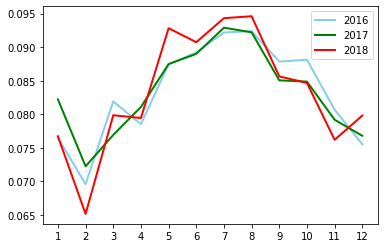

In [17]:
miesiac=['1','2', '3','4','5','6','7','8','9','10','11','12']
c['miesiac']=miesiac
plt.plot( 'miesiac', 'percentage2016', data=c, marker='', color='skyblue', linewidth=2, label="2016")
plt.plot( 'miesiac', 'percentage2017', data=c, marker='', color='green', linewidth=2, label="2017")
plt.plot( 'miesiac', 'percentage2018', data=c, marker='', color='red', linewidth=2, label="2018")
plt.legend()

### DZIEŃ TYGODNIA

In [18]:
d2016=df2016[['day','e']].groupby(['day']).agg(['count'])
d2016.columns=['liczba']
d2017=df2017[['day','e']].groupby(['day']).agg(['count'])
d2017.columns=['liczba']
d2018=df2018[['day','e']].groupby(['day']).agg(['count'])
d2018.columns=['liczba']
d2016['percentage2016'] = d2016['liczba']/d2016['liczba'].sum()
d2016['percentage2017'] = d2017['liczba']/d2017['liczba'].sum()
d2016['percentage2018'] = d2018['liczba']/d2018['liczba'].sum()
d= d2016.drop(['liczba'], axis=1)

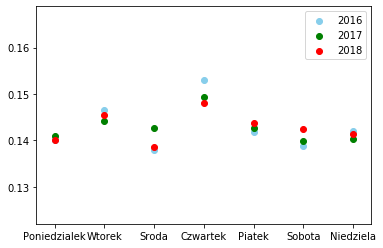

In [27]:
day=['5','1','6','7','4','2','3']
d['dzien']=day
d=d.sort_values('dzien')
dzien=['Poniedzialek','Wtorek','Sroda', 'Czwartek', 'Piatek', 'Sobota','Niedziela']
d['dzien']=dzien
plt.scatter( 'dzien', 'percentage2016', data=d, marker='o', color='skyblue', label="2016")
plt.scatter( 'dzien', 'percentage2017', data=d, marker='o', color='green', label="2017")
plt.scatter( 'dzien', 'percentage2018', data=d, marker='o', color='red', label="2018")
plt.legend()

### GODZINA

In [28]:
def k(row):
    if row['time'] <= time(0,59,59):
        val = 1
    elif time(0,59,59) < row['time'] <= time(1,59,59):
        val = 2
    elif time(1,59,59) < row['time'] <= time(2,59,59):
        val = 3
    elif time(2,59,59) < row['time'] <= time(3,59,59):
        val = 4
    elif time(3,59,59) < row['time'] <= time(4,59,59):
        val = 5
    elif time(4,59,59) < row['time'] <= time(5,59,59):
        val = 6
    elif time(5,59,59) < row['time'] <= time(6,59,59):
        val = 7
    elif time(6,59,59) < row['time'] <= time(7,59,59):
        val = 8
    elif time(7,59,59) < row['time'] <= time(8,59,59):
        val = 9
    elif time(8,59,59) < row['time'] <= time(9,59,59):
        val = 10
    elif time(9,59,59) < row['time'] <= time(10,59,59):
        val = 11
    elif time(10,59,59) < row['time'] <= time(11,59,59):
        val = 12
    elif time(11,59,59) < row['time'] <= time(12,59,59):
        val = 13
    elif time(12,59,59) < row['time'] <= time(13,59,59):
        val = 14
    elif time(13,59,59) < row['time'] <= time(14,59,59):
        val = 15
    elif time(14,59,59) < row['time'] <= time(15,59,59):
        val = 16
    elif time(15,59,59) < row['time'] <= time(16,59,59):
        val = 17
    elif time(16,59,59) < row['time'] <= time(17,59,59):
        val = 18
    elif time(17,59,59) < row['time'] <= time(18,59,59):
        val = 19
    elif time(18,59,59) < row['time'] <= time(19,59,59):
        val = 20
    elif time(19,59,59) < row['time'] <= time(20,59,59):
        val = 21
    elif time(20,59,59) < row['time'] <= time(21,59,59):
        val = 22
    elif time(21,59,59) < row['time'] <= time(22,59,59):
        val = 23
    else:
        val = 24
    return val

In [29]:
df2016['hour'] = df2016.apply(k, axis=1)
df2017['hour'] = df2017.apply(k, axis=1)
df2018['hour'] = df2018.apply(k, axis=1)

In [30]:
e2016=df2016[['hour','e']].groupby(['hour']).agg(['count'])
e2016.columns=['liczba']
e2017=df2017[['hour','e']].groupby(['hour']).agg(['count'])
e2017.columns=['liczba']
e2018=df2018[['hour','e']].groupby(['hour']).agg(['count'])
e2018.columns=['liczba']
e2016['percentage2016'] = e2016['liczba']/e2016['liczba'].sum()
e2016['percentage2017'] = e2017['liczba']/e2017['liczba'].sum()
e2016['percentage2018'] = e2018['liczba']/e2018['liczba'].sum()
e= e2016.drop(['liczba'], axis=1)

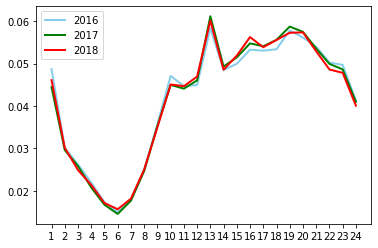

In [31]:
godzina=['1','2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
e['godzina']=godzina
plt.plot( 'godzina', 'percentage2016', data=e, marker='', color='skyblue', linewidth=2, label="2016")
plt.plot( 'godzina', 'percentage2017', data=e, marker='', color='green', linewidth=2, label="2017")
plt.plot( 'godzina', 'percentage2018', data=e, marker='', color='red', linewidth=2, label="2018")
plt.legend()

### TYP PRZESTĘPSTWA

In [32]:
f2016=df2016[['primary_type','e']].groupby(['primary_type']).agg(['count'])
f2016.columns=['liczba']
f2017=df2017[['primary_type','e']].groupby(['primary_type']).agg(['count'])
f2017.columns=['liczba']
f2018=df2018[['primary_type','e']].groupby(['primary_type']).agg(['count'])
f2018.columns=['liczba']
f2016['percentage2016'] = f2016['liczba']/f2016['liczba'].sum()
f2016['percentage2017'] = f2017['liczba']/f2017['liczba'].sum()
f2016['percentage2018'] = f2018['liczba']/f2018['liczba'].sum()
f= f2016.drop(['liczba'], axis=1)

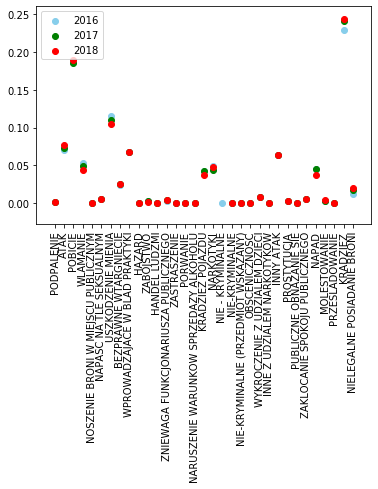

In [33]:
przestepstwa=['PODPALENIE','ATAK','POBICIE','WLAMANIE','NOSZENIE BRONI W MIEJSCU PUBLICZNYM','NAPASC NA TLE SEKSUALNYM','USZKODZENIE MIENIA','BEZPRAWNE WTARGNIECIE','WPROWADZAJACE W BLAD PRAKTYKI','HAZARD','ZABOJSTWO','HANDEL LUDZMI','ZNIEWAGA FUNKCJONARIUSZA PUBLICZNEGO','ZASTRASZENIE','PORWANIE','NARUSZENIE WARUNKOW SPRZEDAZY ALKOHOLU','KRADZIEZ POJAZDU','NARKOTYKI','NIE - KRYMINALNE','NIE-KRYMINALNE','NIE-KRYMINALNE (PRZEDMIOT WSKAZANY)','OBSCENICZNOSC','WYKROCZENIE Z UDZIALEM DZIECI','INNE Z UDZIALEM NARKOTYKOW','INNY ATAK','PROSTYTUCJA','PUBLICZNE OBNAZANIE SIE','ZAKLOCANIE SPOKOJU PUBLICZNEGO','NAPAD','MOLESTOWANIE','PRZESLADOWANIE','KRADZIEZ','NIELEGALNE POSIADANIE BRONI']
f['przestepstwa']=przestepstwa
plt.scatter( 'przestepstwa', 'percentage2016', data=f, marker='o', color='skyblue', label="2016")
plt.scatter( 'przestepstwa', 'percentage2017', data=f, marker='o', color='green', label="2017")
plt.scatter( 'przestepstwa', 'percentage2018', data=f, marker='o', color='red', label="2018")
plt.xticks(rotation=90)
plt.legend()